
    SYS Unit cell
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    SYS Number of periodic dimensions: 3
    SYS Cell parameter     a:    46.9370
    SYS Cell parameter     b:    44.1214
    SYS Cell parameter     c:    45.1826
    SYS Cell parameter alpha:   90.00000
    SYS Cell parameter  beta:   90.00000
    SYS Cell parameter gamma:   90.00000
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


  XYZH5 Loading XYZ file './data/out_unbiased5.xyz' into 'trajectory/pos' of
  XYZH5 HDF5 file 'trajectory-out-unbaised5.h5'
[  1   2   4   5   7   8  10  11  13  14  16  17  19  20  22  23  25  26
  28  29  31  32  34  35  37  38  40  41  43  44  46  47  49  50  52  53
  55  56  58  59  61  62  64  65  67  68  70  71  73  74  76  77  79  80
  82  83  85  86  88  89  91  92  94  95  97  98 100 101 103 104 106 107
 109 110 112 113 115 116 118 119 121 122 124 125 127 128 130 131 133 134
 136 137 139 140 142 143 145 146 148 149

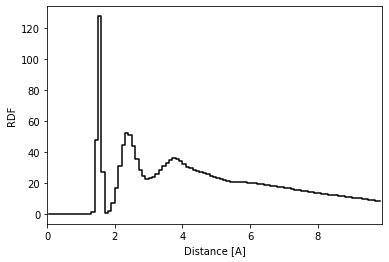

In [10]:
import numpy as np 
from yaff import *
#system = System.from_file('../training-set/dataset_1593.xyz', rvecs=np.diag([23.46511000, 23.46511000, 23.46511000])*angstrom)
#system = System.from_file('./out7.xyz', rvecs=np.diag([46.93703259338623,44.1214358830923,45.18259257711876])*angstrom)
system = System.from_file('./data/out_unbiased5.xyz', rvecs=np.diag([46.93703259338623,44.1214358830923,45.18259257711876])*angstrom)

# Create a HDF5 file and convert the XYZ file to arrays in the HDF5 file
import h5py as h5
with  h5.File('trajectory-out-unbaised5.h5', mode='w') as f:
    system.to_hdf5(f)
    xyz_to_hdf5(f, './data/out_unbiased5.xyz')

    # Select two lists of atom indexes based on the ATSELECT rules '1' and '8'
    select0 = system.get_indexes('1')
    select1 = system.get_indexes('2')
    print(select0)

    # Note. The remainder of the example may be moved to a separate script if
    # that would be more convenient, e.g. in case different RDFs must be generated.
    # This would avoid repetetive conversion of the XYZ file.

    # Create the RDF.
    rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0, select1=select1)
    # One may make plots with the rdf object ...
    rdf.plot()
    # ... or access the results as Numpy arrays
    print()
    print('RDF DATA FOR THE X-AXIS [A]')
    print(rdf.d/angstrom)
    print()
    print('RDF DATA FOR THE Y-AXIS')
    print(rdf.rdf)
    #     rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0, select1=select0)
    # One may make plots with the rdf object ...
    #     rdf.plot()
    #     rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select1)
    #     # One may make plots with the rdf object ...
    #     rdf.plot()